In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0, 1 )

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
##### Independent and Dependent Features

x = df.drop("FWI", axis = 1)
y = df[["FWI"]]

In [11]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


In [13]:
#### Train test split

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [14]:
xtrain.shape

(194, 11)

In [15]:
xtest.shape

(49, 11)

In [16]:
ytrain.shape

(194, 1)

In [17]:
ytest.shape

(49, 1)

In [18]:
#### Feature selection

xtrain.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.670958,-0.337816,-0.379423,0.682427,0.518975,0.379783,0.635134,0.482504,0.522376,0.329719
RH,-0.670958,1.000000,0.244369,0.253822,-0.670806,-0.411366,-0.222809,-0.720591,-0.353125,-0.469223,-0.431122
Ws,-0.337816,0.244369,1.000000,0.163573,-0.170705,-0.016396,0.085108,-0.036509,0.025135,-0.088634,-0.208763
Rain,-0.379423,0.253822,0.163573,1.000000,-0.609511,-0.345050,-0.329392,-0.390734,-0.351519,-0.408232,-0.024182
FFMC,0.682427,-0.670806,-0.170705,-0.609511,1.000000,0.607857,0.496971,0.750048,0.592086,0.764152,0.250790
DMC,0.518975,-0.411366,-0.016396,-0.345050,0.607857,1.000000,0.876047,0.668228,0.981422,0.600618,0.224667
DC,0.379783,-0.222809,0.085108,-0.329392,0.496971,0.876047,1.000000,0.483117,0.941664,0.502121,-0.041093
ISI,0.635134,-0.720591,-0.036509,-0.390734,0.750048,0.668228,0.483117,1.000000,0.628779,0.752428,0.301902
BUI,0.482504,-0.353125,0.025135,-0.351519,0.592086,0.981422,0.941664,0.628779,1.000000,0.596844,0.121809
Classes,0.522376,-0.469223,-0.088634,-0.408232,0.764152,0.600618,0.502121,0.752428,0.596844,1.000000,0.200774


<Axes: >

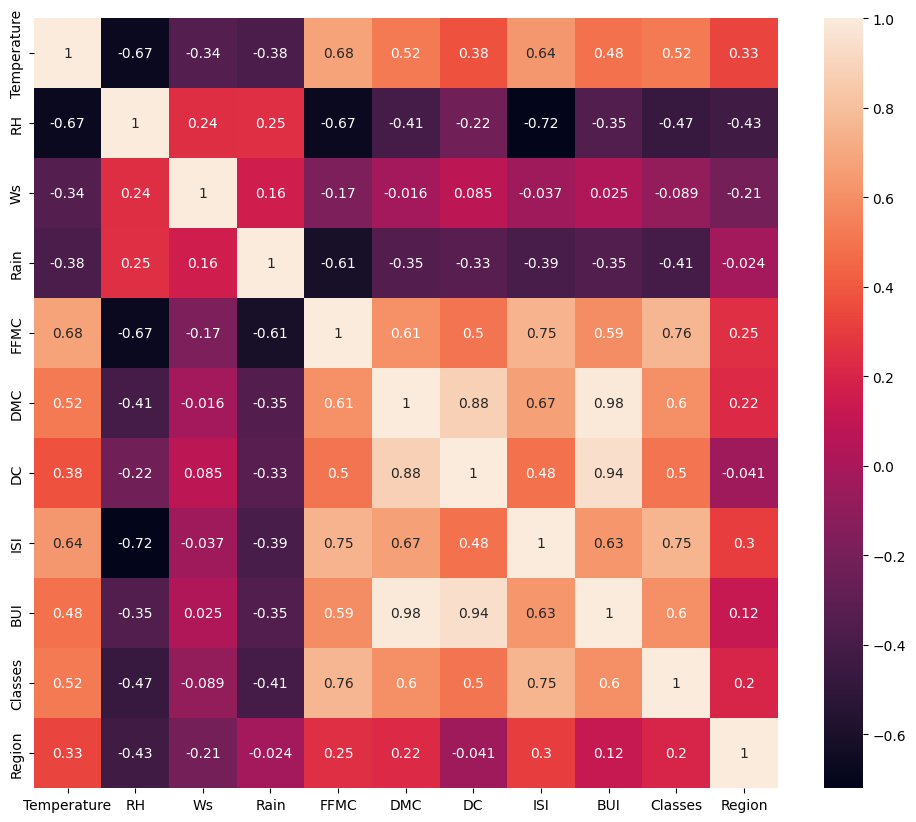

In [19]:
#### check for multicollinearity

plt.figure(figsize = (12, 10))
corr = xtrain.corr()
sns.heatmap(corr, annot = True)

In [20]:
###Return columns with required correlation threshold

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [21]:
corr_features=correlation(xtrain, 0.85)

In [22]:
#### Drop features when correlation is more than 0.85

xtrain.drop(corr_features, axis = 1, inplace = True)
xtest.drop(corr_features, axis = 1, inplace = True)
xtrain.shape, xtest.shape

((194, 9), (49, 9))

Feature scaling or standardization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [24]:
xtrain_scaled

array([[ 1.29347938, -0.45660587, -0.17076263, ...,  0.85904577,
         0.89235436,  1.03142125],
       [ 0.49091542, -0.39059876, -0.17076263, ..., -0.76484558,
        -1.12063105,  1.03142125],
       [-0.04412723, -0.91865563,  0.97158049, ...,  2.04666779,
         0.89235436,  1.03142125],
       ...,
       [-0.57916987,  1.19357183,  0.21001841, ..., -0.93450586,
        -1.12063105, -0.96953597],
       [ 0.75843674,  0.40148653,  1.35236154, ...,  0.98023169,
         0.89235436, -0.96953597],
       [-1.91677649,  1.7876358 , -0.93232472, ..., -1.15264052,
        -1.12063105, -0.96953597]])

Text(0.5, 1.0, 'x_train after scaling')

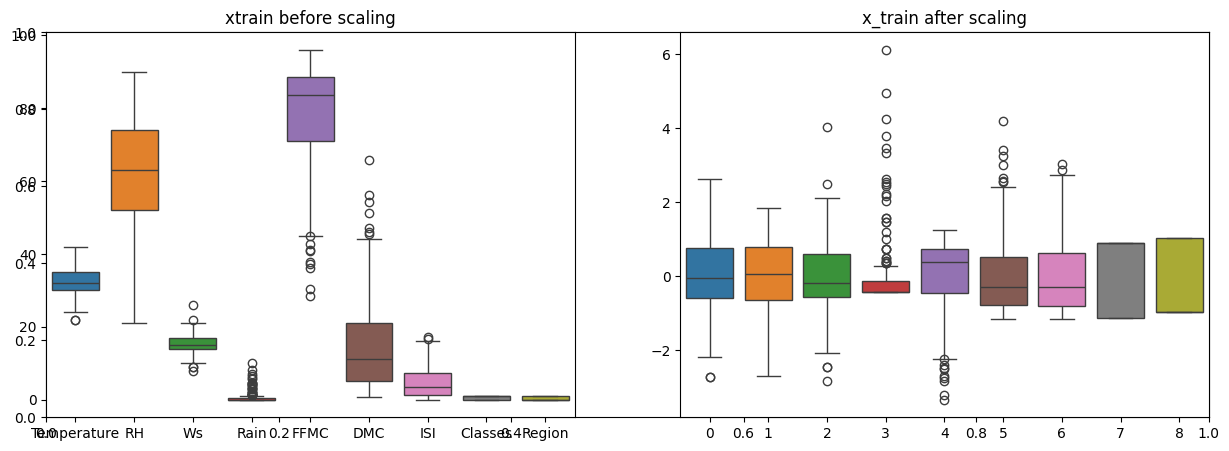

In [25]:
#### Box plots to understand effects of standard scaler

plt.subplots(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = xtrain)
plt.title('xtrain before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data = xtrain_scaled)
plt.title('x_train after scaling')


Model Training

Mean Absolute Error is  0.7899795468305479
R2 score is  0.9158321786854208


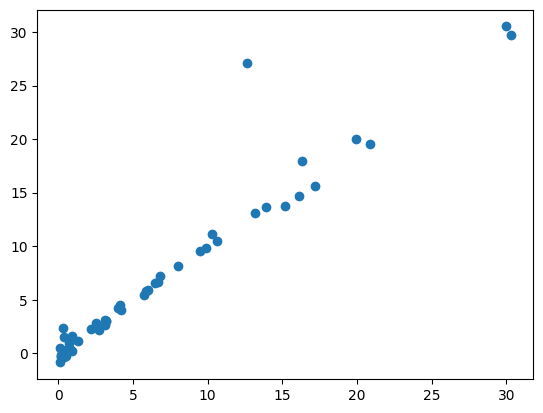

In [34]:
#### Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model1 = LinearRegression()
model1.fit(xtrain_scaled, ytrain)
ypred = model1.predict(xtest_scaled)
mae = mean_absolute_error(ytest, ypred)
score = r2_score(ytest, ypred)
print("Mean Absolute Error is ", mae)
print("R2 score is ", score)

plt.scatter(ytest, ypred)

Mean Absolute Error is  1.4035733738112117
R2 score is  0.9135482085944319


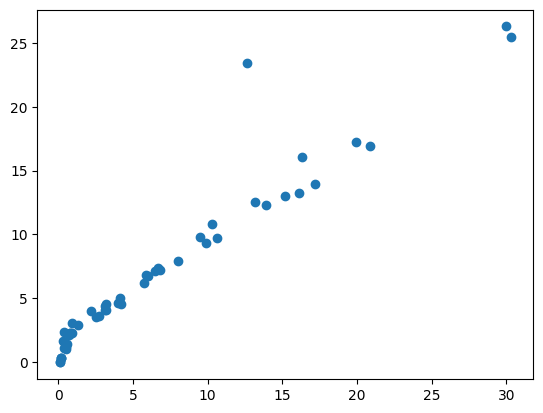

In [ ]:
#### Lasso regression


from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

model2 = Lasso()
model2.fit(xtrain_scaled, ytrain)
ypred = model2.predict(xtest_scaled)
mae = mean_absolute_error(ytest, ypred)
score = r2_score(ytest, ypred)
print("Mean Absolute Error is ", mae)
print("R2 score is ", score)

plt.scatter(ytest, ypred)


Mean Absolute Error is  0.7852178275496748
R2 score is  0.9183240202715335


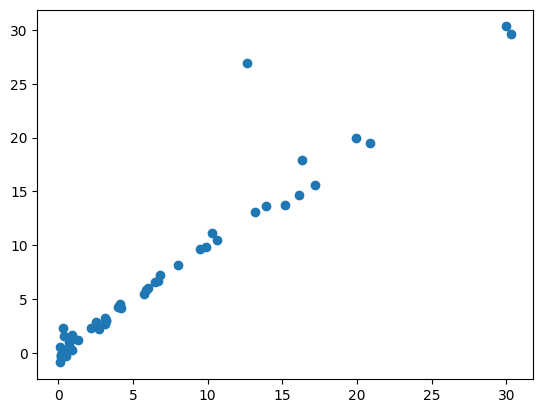

In [39]:
#### Ridge Regression model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

model3 = Ridge()
model3.fit(xtrain_scaled, ytrain)
ypred = model3.predict(xtest_scaled)
mae = mean_absolute_error(ytest, ypred)
score = r2_score(ytest, ypred)
print("Mean Absolute Error is ", mae)
print("R2 score is ", score)

plt.scatter(ytest, ypred)

Mean Absolute Error is  2.09336819814875
R2 score is  0.8637077589605121


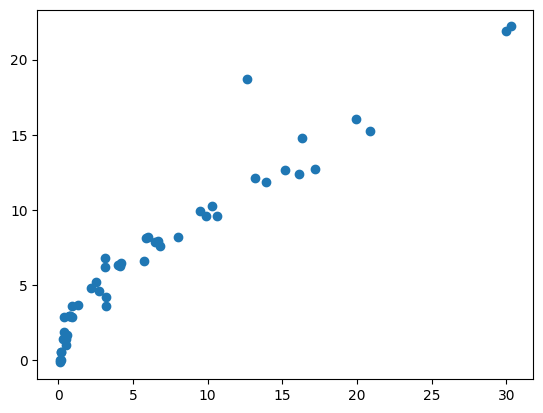

In [40]:
### Elastic Net Regression


from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

model4 = ElasticNet()
model4.fit(xtrain_scaled, ytrain)
ypred = model4.predict(xtest_scaled)
mae = mean_absolute_error(ytest, ypred)
score = r2_score(ytest, ypred)
print("Mean Absolute Error is ", mae)
print("R2 score is ", score)

plt.scatter(ytest, ypred)

Cross Validation

In [41]:
#### Lasso

from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(xtrain_scaled, ytrain)

d:\ml codes\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=5)

In [42]:
lassocv.predict(xtest_scaled)

array([ 0.432075  , 19.93457213,  1.53333853,  4.46479871, 27.04977122,
        3.15976727, 29.61852281,  0.98623085,  5.91215953, 30.42656899,
        3.12429039,  0.26635272,  4.21428625, -0.22937278, -0.32697632,
       19.48521739, -0.17667091,  0.50961133, -0.26717342,  1.18108434,
       17.93306215, -0.88054809, -0.29846611,  5.47818139,  9.77829178,
       10.48764935, 13.77329232,  5.84880781,  2.79636737,  1.68975804,
        1.15394255, 11.09810152, 13.11388021,  9.62609705,  7.23386277,
       14.66974612,  3.08980873, 13.60377707,  2.64506466,  6.70684535,
        6.57028305,  2.27974018,  2.22200016,  2.3441876 , 15.57618205,
        0.33516767,  8.14467077,  4.04330665,  0.33428132])

In [43]:
lassocv.alpha_

np.float64(0.012072113205241986)

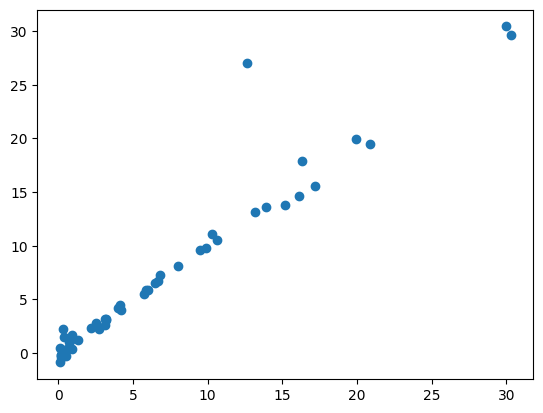

In [45]:
ypred = lassocv.predict(xtest_scaled)
plt.scatter(ytest, ypred)